In [1]:
import pandas as pd

#path for dataframe
df = pd.read_csv(r"E:/Users/Nathan/311_Service_Requests_from_2010_to_Present_min.csv")
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


## Question 1: Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

In the first question, we should look the 311 data set. 311 service is for New York citizens where citizens can report non-emergency requests from the city.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Unique Key              int64  
 2   Created Date            object 
 3   Closed Date             object 
 4   Complaint Type          object 
 5   Location Type           object 
 6   Incident Zip            float64
 7   Incident Address        object 
 8   Street Name             object 
 9   Address Type            object 
 10  City                    object 
 11  Status                  object 
 12  Resolution Description  object 
 13  Borough                 object 
 14  Latitude                float64
 15  Longitude               float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


In [3]:
#Let's analyze the complaint types
df['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [5]:
#let's see if there's any missing values
df['Complaint Type'].isnull().sum()

0

In [6]:
#Now we are going to find the amount of each complaint
df['Complaint Type'].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Appliance                       4
Mold                            1
Electric      

It's clear the the heat/hot water problem is the one that New York City should focus on first. But notice how there's a big similairty between the HEAT/HOT WATER and HEATING group. This is because before 2014, the dataset is using the label HEATING but after 2014 the label changed to HEATING/HOT WATER. We need to correct the labels and analyze them together

In [7]:
import numpy as np
df['complaint Type'] = np.where(df['Complaint Type']=='HEATING','HEAT/HOT WATER',df['Complaint Type'])

In [9]:
#Let's check the amount of values again
df["Complaint Type"].value_counts().head()

HEAT/HOT WATER          1261574
HEATING                  887850
PLUMBING                 711130
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     451643
Name: Complaint Type, dtype: int64

In [10]:
#Let's look at the complaint types in a bar graph
#First, import the matplotlib library
import matplotlib.pyplot as plt

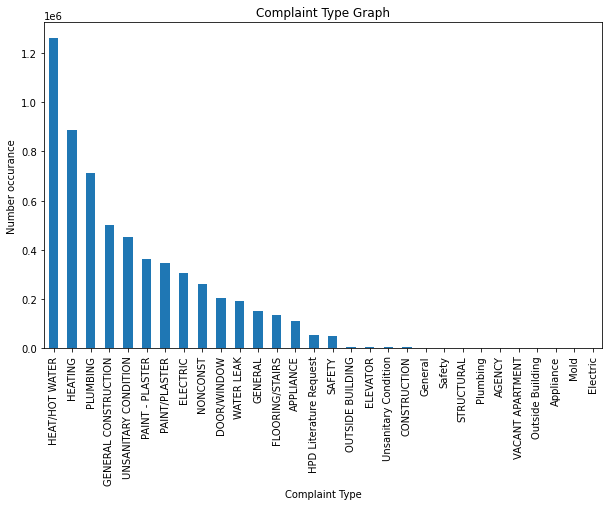

In [11]:
df["Complaint Type"].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Complaint Type') # add to x-label to the plot
plt.ylabel('Number occurance') # add y-label to the plot
plt.title('Complaint Type Graph') # add title to the plot

plt.show()

In [12]:
#Let's look at created date column
df["Created Date"].head()

0    02/02/2020 06:09:17 AM
1    02/02/2020 02:15:24 PM
2    02/02/2020 02:27:41 AM
3    02/02/2020 12:13:18 PM
4    02/02/2020 01:59:44 PM
Name: Created Date, dtype: object

In [15]:
#Before changing created_date column to a datetime object, first, let's create a dataframe that only contains
# HEAT/HOT WATER problems.
complaint_df = df[df['Complaint Type'] == "HEAT/HOT WATER"]

In [16]:
#complaint_df has only HEAT/HOT WATER problems, how can we check? We know from the first analyze that 
#HEAT/HOT WATER problem has 1960914 occurence, so if we look at complaint_df size, we can clearly see that
#there are 1960914 entries
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261574 entries, 0 to 6019841
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1261574 non-null  int64  
 1   Unique Key              1261574 non-null  int64  
 2   Created Date            1261574 non-null  object 
 3   Closed Date             1256876 non-null  object 
 4   Complaint Type          1261574 non-null  object 
 5   Location Type           1261574 non-null  object 
 6   Incident Zip            1254458 non-null  float64
 7   Incident Address        1261574 non-null  object 
 8   Street Name             1261574 non-null  object 
 9   Address Type            1254786 non-null  object 
 10  City                    1254598 non-null  object 
 11  Status                  1261574 non-null  object 
 12  Resolution Description  1261495 non-null  object 
 13  Borough                 1261574 non-null  object 
 14  La

In [17]:
#Now, let's make even more small and useful dataset for our analysis (this is optional, you can use complaint_df)
heat_year_sum_df = complaint_df[["Complaint Type", "Created Date"]]
heat_year_sum_df.head()

,Complaint Type,Created Date
0,HEAT/HOT WATER,02/02/2020 06:09:17 AM
2,HEAT/HOT WATER,02/02/2020 02:27:41 AM
3,HEAT/HOT WATER,02/02/2020 12:13:18 PM
5,HEAT/HOT WATER,02/02/2020 07:52:08 AM
7,HEAT/HOT WATER,02/02/2020 09:00:54 AM


In [25]:
#Now we have every HEAT/HOT WATER problem and it's created date. Let's change created_date column into datetime
#object
heat_year_sum_df["Created Date"] = pd.to_datetime(heat_year_sum_df['Created Date'])

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
heat_year_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261574 entries, 0 to 6019841
Data columns (total 2 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Complaint Type  1261574 non-null  object        
 1   Created Date    1261574 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 28.9+ MB


In [28]:
#let's look at new format
heat_year_sum_df["Created Date"].head()

0   2020-02-02 06:09:17
2   2020-02-02 02:27:41
3   2020-02-02 12:13:18
5   2020-02-02 07:52:08
7   2020-02-02 09:00:54
Name: Created Date, dtype: datetime64[ns]

In [30]:
#We will group the incidents by every year
grp = heat_year_sum_df.groupby(heat_year_sum_df['Created Date'].dt.year)

In [31]:
grp.count()

,Complaint Type,Created Date
Created Date,,
2014,132732,132732
2015,225678,225678
2016,227959,227959
2017,213521,213521
2018,223835,223835
2019,212075,212075
2020,25774,25774


In [32]:
#let's make it a new data frame out of this and try to see visually
pd.DataFrame = grp.count()
grp_df = pd.DataFrame
grp_df

,Complaint Type,Created Date
Created Date,,
2014,132732,132732
2015,225678,225678
2016,227959,227959
2017,213521,213521
2018,223835,223835
2019,212075,212075
2020,25774,25774


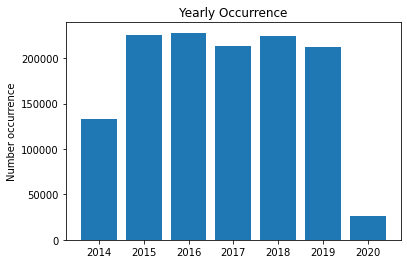

In [34]:
#Let's visualize the data
plt.bar(grp_df.index, grp_df["Complaint Type"])
plt.xticks(grp_df.index.values)
plt.ylabel('Number occurrence')
plt.title('Yearly Occurrence')
 
plt.show()

## CONCLUSION: Department of Housing Preservation and Development of New York City should address HEAT/HOT WATER problem first. There are 1261574  HEAT/HOT WATER incidents total.